In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 24: Hypothesis Testing Errors & Power

Throughout this block, we have been studying hypothesis tests. We have covered the four basic steps of any hypothesis test, and we have practiced various methods for obtaining the distribution of our test statistic under the null hypothesis. 

After we have reached a conclusion (reject or fail to reject), we must consider possible errors. 

### Type I error 

Type I error is the event that we rejected the null hypothesis when the null hypothesis was actually true. Type I error is also known as a false positive. The probability of a Type I error is usually defined by the threshold used for rejection. A common threshold is 0.05. Those of you who have taken statistics before may recognize this value as $\alpha$. 

### Type II error

Type II error is the event that we failed to reject the null hypothesis when the null hypothesis was actually false. This is otherwise known as a false negative. The probability of a Type II error is harder to find and requires a more in-depth analysis of a hypothesis test. The probability of a Type II error is often given as $\beta$, and $1-\beta$ is referred to as **Power**. The power of a test is probability that we will reject the null hypothesis when we are supposed to. 

Which one of these errors is more serious? It depends on the context of the problem. 

### Example: Golf Balls

Joe has a summer job at a golf course and one of his jobs is to fish out golf balls from the water traps. He has a theory that certain types of golf ball are more likely to end up in the water than others. Let's assume there are four brands of golf ball, let's and assume that all four are used equally at this golf course. He fishes out 100 golf balls and counts each brand. He finds 30 of brand A, 30 of brand B, 20 of brand C and 20 of brand D. Conduct a hypothesis test to determine whether certain types of golf ball are more likely than others to end up in the water.

Step 1: Hypotheses

**Null Hypothesis:** The four golf ball brands are equally likely to end up in the water traps.

**Alternative Hypothesis:** Either brand A, B, C, D, or some combination thereof  is more likely to end up in the water traps.

Step 2: Test statistic

There are many correct answers, but let's go with sum of absolute difference between observed and expected counts under $H_0$. To do this, we need to find the expected counts. If each ball was equally likely, how many should we expected to find of each if we select 100 golf balls? 

If each ball is equally likely to end up in the water traps, then Joe should expect to find 25 balls of each type (100 balls divided by 4 brands).

Step 3: $p$-value

We need the distribution of the test statistic under $H_0$. 

In [3]:
# Simulation of a non-binomial distribution

brands = ['A','B','C','D']
sample_X = [] # initialize

# Use a systematic approach with the given test statistic thought process
for i in np.arange(10**4):
    X = np.random.choice(brands,100,replace=True)
    sample_X = np.append(sample_X,abs(sum(X=='A')-25)+abs(sum(X=='B')-25)+abs(sum(X=='C')-25)+abs(sum(X=='D')-25))

In [4]:
# The test statistic of the given sample
(30-25)+(30-25)+(25-20)+(25-20)

20

In [5]:
# P-value calculation
p_val = np.sum(sample_X > 19)/10**4
print('The associated p-value for the given golf ball sample is:',p_val)

The associated p-value for the given golf ball sample is: 0.1902


Step 4: Conclude

In conclusion, we fail to reject the Null Hypothesis with an approximate p-value of 0.19. This suggests that the four ball brands are equally likely to end up in the water traps.

What kind of error could we have made in this case? 

By failing to reject the null hypothesis, we are prone to **Type II** error - a false negative. This would mean that we failed to identify that some ball brands are more likely to end up in the water traps than others.

#### Power 
Suppose that, in truth, 30% of the balls found in the water were brand A, 30% were brand B, 20% were brand C and 20% were brand D. In this case, our collected sample reflected this truth perfectly. However, our hypothesis test failed to recognize this deviation from equal proportions. We made a type II error. This is because this test has fairly low power. Use simulation to determine the power of this test. 

I am looking for the probability that I reject the null hypothesis given the true proportions laid out above. Well, first I need to figure out for what values of my test statistic I would reject $H_0$. 

In [6]:
# Define a function so that we may use guess-and-check methods
def X_cutoff(X):
    return np.sum(sample_X >= X)/len(sample_X)

In [7]:
X_cutoff(24)

0.0759

In [8]:
X_cutoff(25)

0.0452

Test statistic values of 25 or greater would cause us to reject $H_o$.

Next, I need to simulate from the true population and determine how often my test statistic would have met this threshold. 

In [13]:
true_pop_sim = [] # initialize

for i in np.arange(10**4):
    ball_sample = stats.multinomial.rvs(100,[0.3,0.3,0.2,0.2],size=1) # multinomial distribution
    true_pop_sim = np.append(true_pop_sim, sum(abs(sum(ball_sample)-25)))
    
sample_tab = Table().with_column('X',true_pop_sim)
sample_tab

X
26
34
24
32
22
22
26
38
16
22


(array([  76.,  766., 2043., 2765., 1722., 1655.,  700.,  217.,   51.,
           5.]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <a list of 10 Patch objects>)

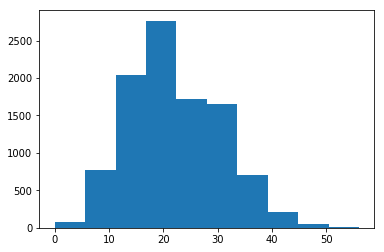

In [14]:
plt.hist(true_pop_sim)

In [18]:
# Power calculation
power = np.mean(true_pop_sim >= 25)
print('The power of the test is:',power)

The power of the test is: 0.3449


What do you think about this power? 

This power is small enough to be worrisome to me. We interpret $\beta = 65\%$ to denote the probability of a Type II error, or a false negative result given the structure of the experiment and the given distribution. Thus, the likelihood that we are wrong is greater than 50%, which seems counterintuitive.

Repeat this power calculation, but assume Joe collects 500 balls instead of 100. Note that you will have to obtain a new critical value. What does this tell you about power and sample size?

In [19]:
sample_X = [] # initialize

# We expect to find 500/4 = 125 balls of each brand
for i in np.arange(10**4):
    X = np.random.choice(brands,500,replace=True)
    sample_X = np.append(sample_X,abs(sum(X=='A')-125)+abs(sum(X=='B')-125)+abs(sum(X=='C')-125)+abs(sum(X=='D')-125))

In [20]:
X_cutoff(54)

0.0623

In [21]:
X_cutoff(55)

0.0491

For this sample, test statistic values of 55 or greater will cause us to reject $H_o$.

In [22]:
true_pop_sim = [] # initialize
for i in np.arange(10**4):
    ball_sample = stats.multinomial.rvs(500,[0.3,0.3,0.2,0.2],size=1) # multinomial distribution
    true_pop_sim = np.append(true_pop_sim, sum(abs(sum(ball_sample)-125)))
    
power = np.mean(true_pop_sim >= 55)
print('The power of this test is:',power)

The power of this test is: 0.9818


This power is very high compared to the earlier test. We interpret $\beta = 2\%$ to denote a low probability of Type II error, meaning that our test has improved given the same golf ball proportions. Therefore, for a higher sample size, power increases, beta decreases, and the overall quality of the test is better for the accuracy of final conclusions.